In [1]:
%reload_ext autoreload
%autoreload 2
import bmxobs
from bmxobs.SingleFreqGeometry import SingleFreqGeometry
from bmxobs.TheoryPredictor import TheoryPredictor
import fitsio
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j1
from scipy.optimize import least_squares
import copy
from numba import jit
import multiprocessing
import time

In [2]:
bmxobs.__path__

['/direct/astro+u/wcook/bmxobs/bmxobs']

In [273]:
fileIn = 'fits/10_25_base.txt'
f = open(fileIn,'r')
startData = f.read()
f.close()
exec(startData)
Data = []
for ids in Data_ids:
    print(ids)
    Data.append(bmxobs.BMXSingleFreqObs(ids, freq_bins=bins))
Theory = TheoryPredictor(Data, Geometry = SingleFreqGeometry(len(Data), freq=Data[0].freq), params = startParams, zeroSats=zeroSats, astroObj=astroObj)

pas/211025_2000


In [266]:
Theory.channels = [11,12,13,14,22,23,24,33,34,44,55,56,57,58,66,67,68,77,78,88]
Theory.datNum = list(range(len(Theory.data)))
print(sum(Theory.fitFunc({})**2))

267145.7697726267


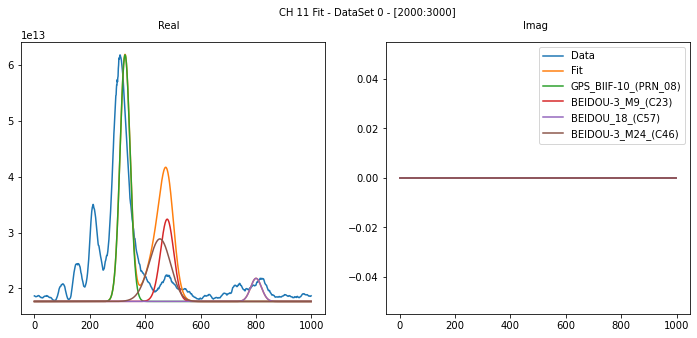

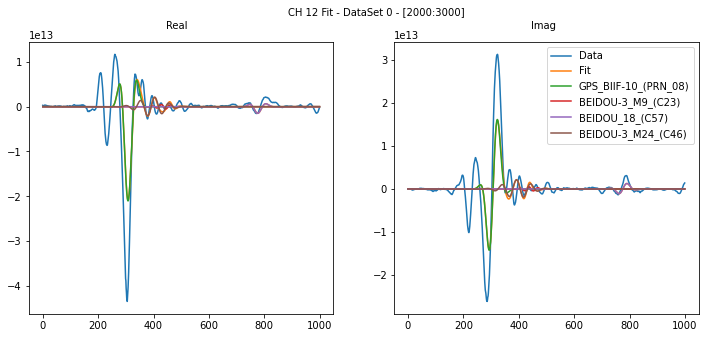

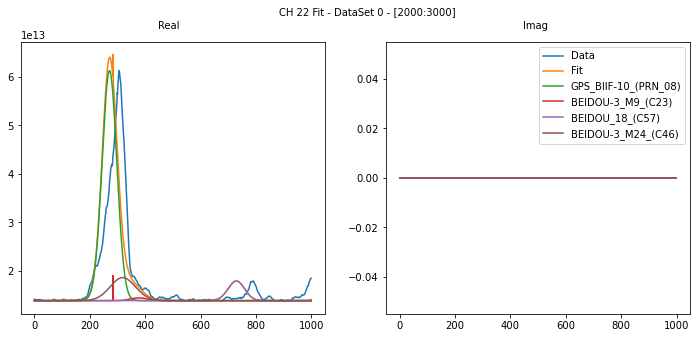

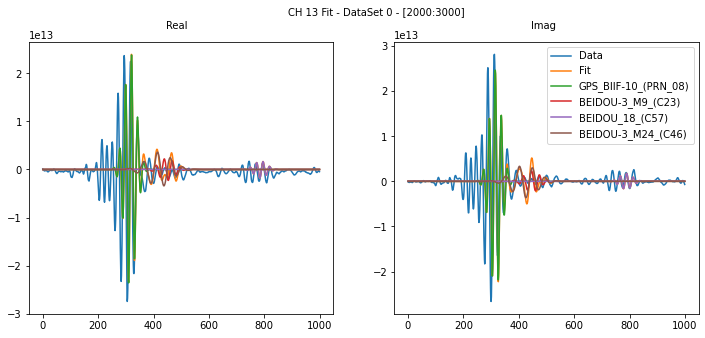

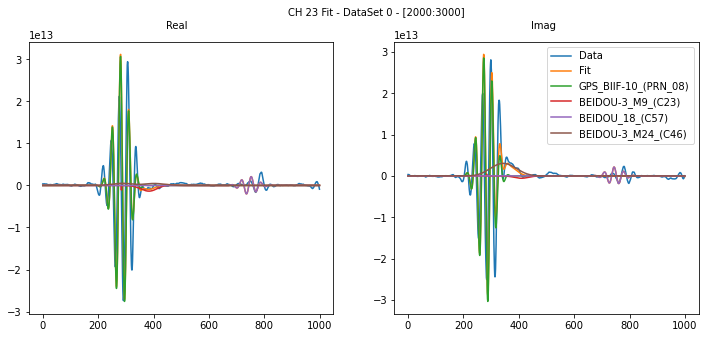

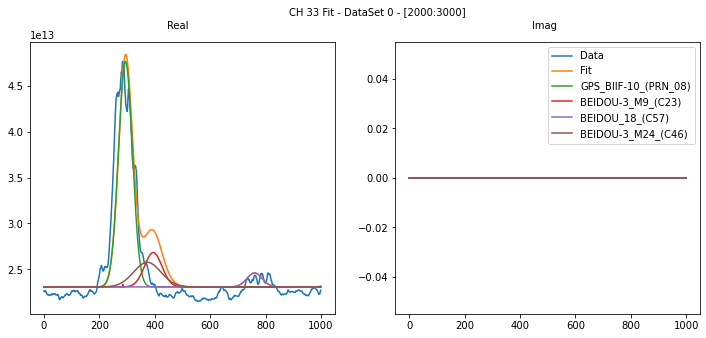

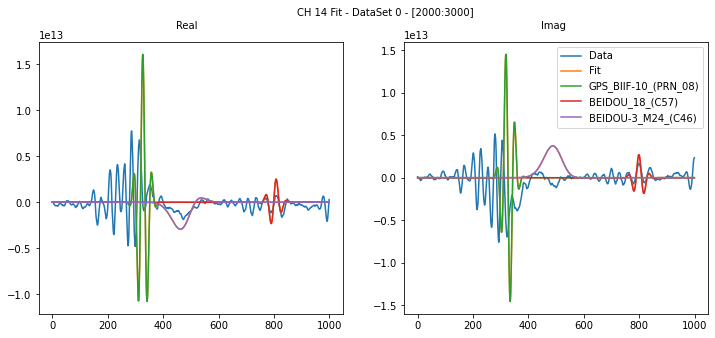

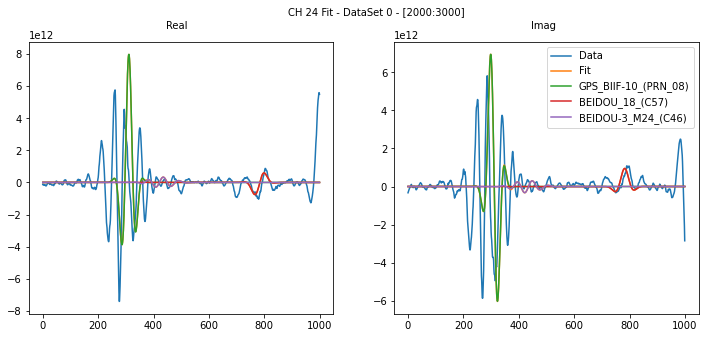

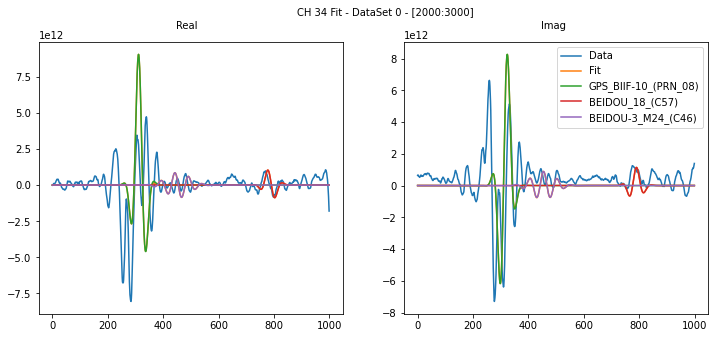

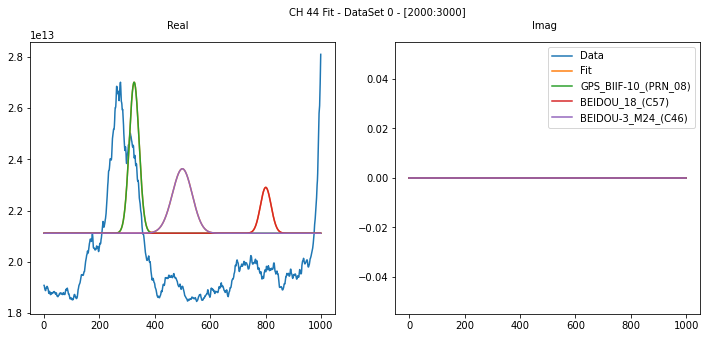

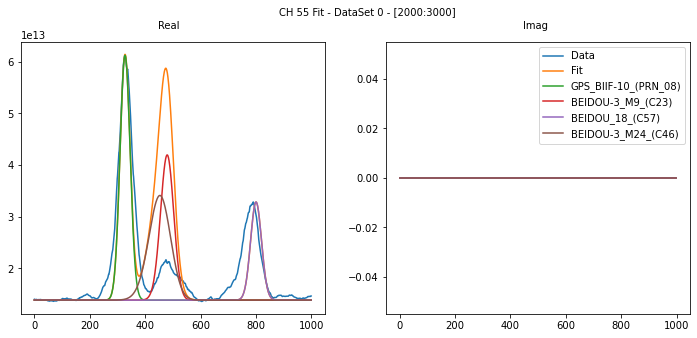

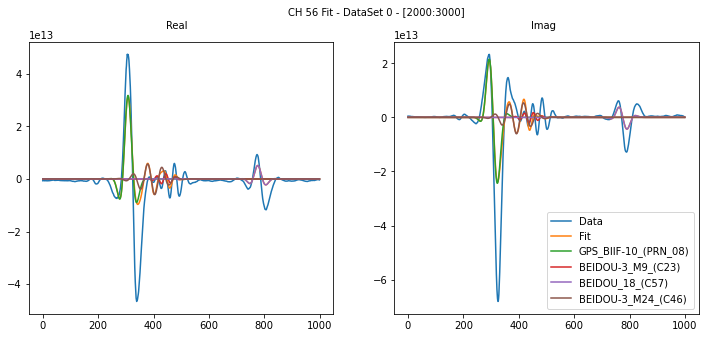

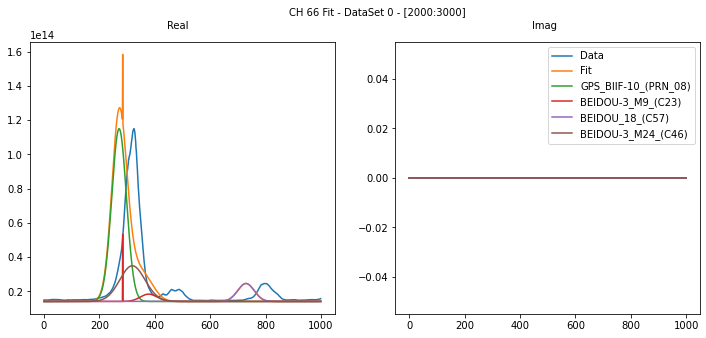

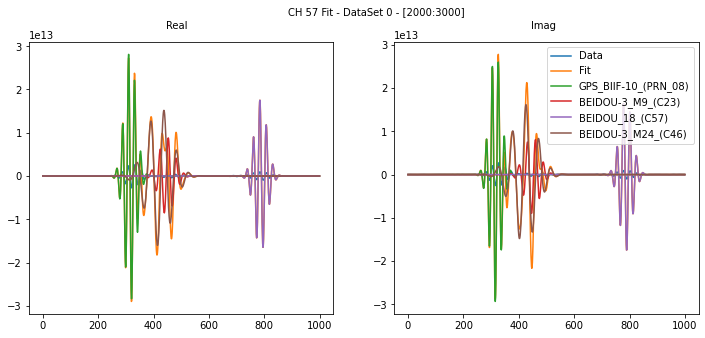

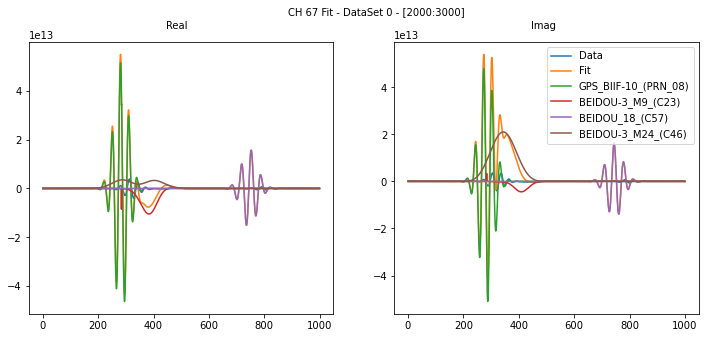

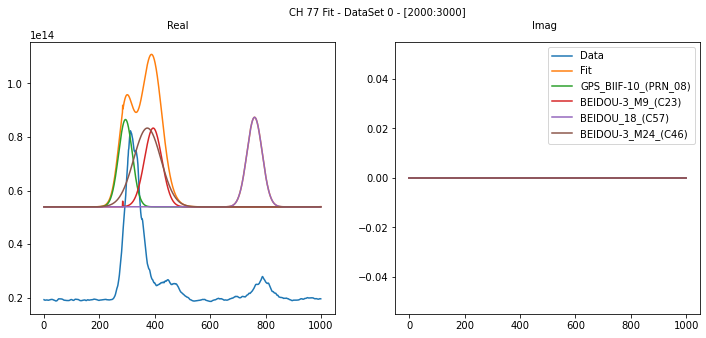

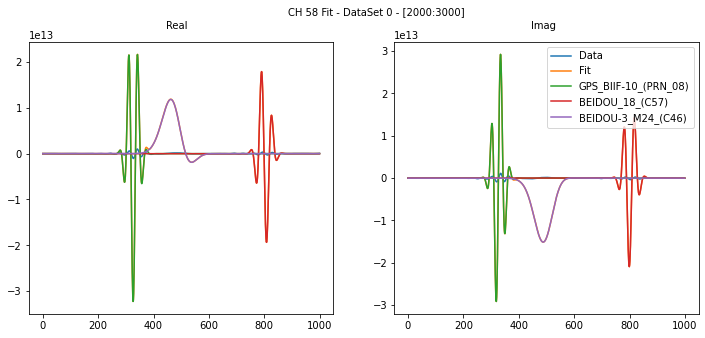

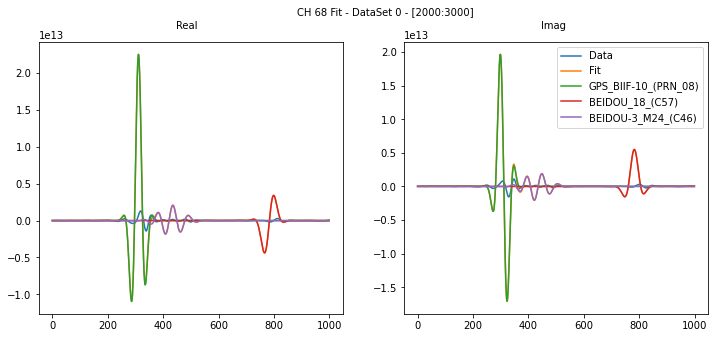

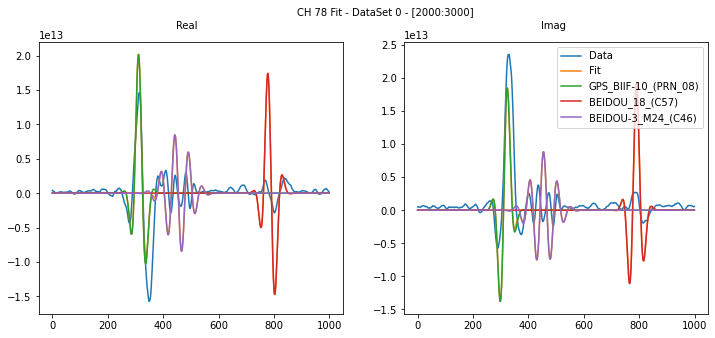

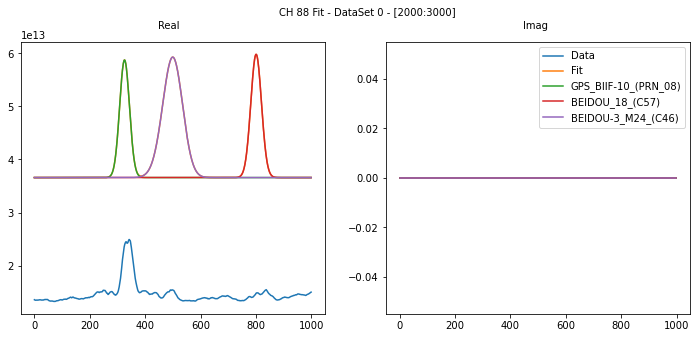

In [276]:
cut = [2000,3000]
channels = [11,12,22,13,23,33,14,24,34,44,55,56,66,57,67,77,58,68,78,88]
mode = 'all'

Theory.showFit(channels = channels, cut=cut,mode=mode, perSat=True)

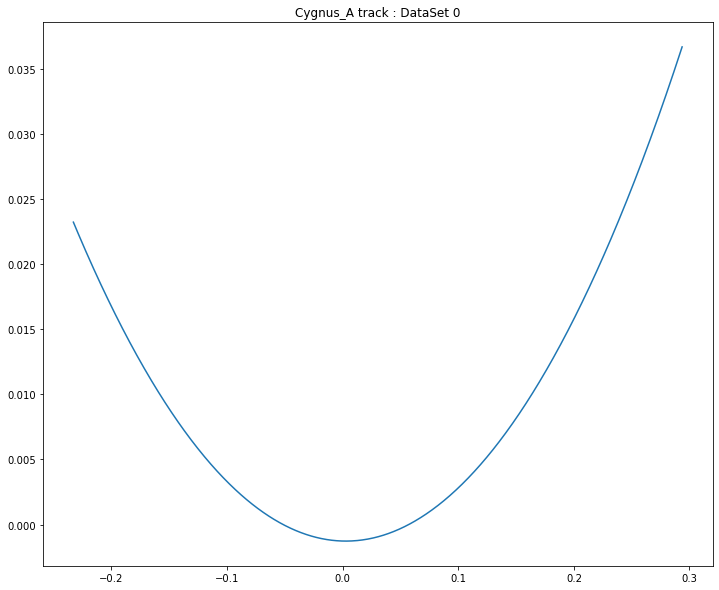

In [61]:
cut = [9000,10000]
sats=['Cygnus_A']

Theory.trackPlot(cut=cut,sats=sats)

In [226]:
params = {'A1_BEIDOU-3_M13_(C32)_0': 29695167.04716088, 'A2_BEIDOU-3_M13_(C32)_0': 27810429.82707142, 'A3_BEIDOU-3_M13_(C32)_0': 24655853.233142942, 'A4_BEIDOU-3_M13_(C32)_0': 6556507.397155648, 'A1_GPS_BIIF-9__(PRN_26)_0': 16619449.360525373, 'A1_Cygnus_A_0': 10917944.264389172, 'A2_GPS_BIIF-9__(PRN_26)_0': 18201327.226436604, 'A2_Cygnus_A_0': 8248548.915973368, 'A3_GPS_BIIF-9__(PRN_26)_0': 13957691.603709256, 'A3_Cygnus_A_0': 817720.662271559, 'A4_GPS_BIIF-9__(PRN_26)_0': 898978.8095981231, 'A4_Cygnus_A_0': 522342.8670480406, 'A1_GPS_BIIF-10_(PRN_08)_0': 7280723.035660884, 'A2_GPS_BIIF-10_(PRN_08)_0': 7541670.812571477, 'A3_GPS_BIIF-10_(PRN_08)_0': 5549935.214641856, 'A4_GPS_BIIF-10_(PRN_08)_0': 6215.119676434493, 'A1_BEIDOU-3_M12_(C26)_0': 0.5148270179126859, 'A2_BEIDOU-3_M12_(C26)_0': 8684.711314414839, 'A3_BEIDOU-3_M12_(C26)_0': 23171.233895853686, 'A4_BEIDOU-3_M12_(C26)_0': 2.363684271927923, 'A1_BEIDOU-3_M22_0': 3095220.7683285866, 'A2_BEIDOU-3_M22_0': 3318425.3289795946, 'A3_BEIDOU-3_M22_0': 7800082.087831349, 'A4_BEIDOU-3_M22_0': 0.17686932775785635, 'A1_GPS_BIII-4__(PRN_14)_0': 45878348.6071627, 'A1_GSAT0218_(PRN_E31)_0': 10675697.478510527, 'A1_GSAT0222_(PRN_E33)_0': 4389830.491691177, 'A2_GPS_BIII-4__(PRN_14)_0': 44897384.543760054, 'A2_GSAT0218_(PRN_E31)_0': 9021455.813411329, 'A2_GSAT0222_(PRN_E33)_0': 3587540.343887389, 'A3_GPS_BIII-4__(PRN_14)_0': 49803715.17674662, 'A3_GSAT0218_(PRN_E31)_0': 17657325.573662713, 'A3_GSAT0222_(PRN_E33)_0': 5.035458690982676e-28, 'A4_GPS_BIII-4__(PRN_14)_0': 12334018.414253756, 'A4_GSAT0218_(PRN_E31)_0': 38933445.49884191, 'A4_GSAT0222_(PRN_E33)_0': 1357324.090400439, 'A1_GPS_BIIR-4__(PRN_20)_0': 10616173.118982835, 'A2_GPS_BIIR-4__(PRN_20)_0': 65550833.99344492, 'A3_GPS_BIIR-4__(PRN_20)_0': 75700746.84161678, 'A4_GPS_BIIR-4__(PRN_20)_0': 19113597.673668798, 'A1_BEIDOU-3_M6_(C22)_0': 1175140.7410162308, 'A1_BEIDOU-3_M16_(C35)_0': 6293332.019651182, 'A2_BEIDOU-3_M6_(C22)_0': 0.003123793255942253, 'A2_BEIDOU-3_M16_(C35)_0': 2084274.0709640516, 'A3_BEIDOU-3_M6_(C22)_0': 11896825.133265778, 'A3_BEIDOU-3_M16_(C35)_0': 640280.4453059667, 'A4_BEIDOU-3_M6_(C22)_0': 4217213.154158668, 'A4_BEIDOU-3_M16_(C35)_0': 0.00013015498094658492, 'A1_GSAT0209_(PRN_E09)_0': 11413812.855405945, 'A1_GSAT0219_(PRN_E36)_0': 4970399.475462913, 'A2_GSAT0209_(PRN_E09)_0': 12185572.3325773, 'A2_GSAT0219_(PRN_E36)_0': 3777452.5340460287, 'A3_GSAT0209_(PRN_E09)_0': 8485692.436145399, 'A3_GSAT0219_(PRN_E36)_0': 5315940.773136939, 'A4_GSAT0209_(PRN_E09)_0': 3020182.9435516093, 'A4_GSAT0219_(PRN_E36)_0': 5736177.06378373, 'A1_GPS_BIIF-11_(PRN_10)_0': 25596265.90918701, 'A2_GPS_BIIF-11_(PRN_10)_0': 24485395.269343242, 'A3_GPS_BIIF-11_(PRN_10)_0': 29365162.249967657, 'A4_GPS_BIIF-11_(PRN_10)_0': 12110190.928046746, 'A1_BEIDOU-3_M5_(C21)_0': 10989952.006005019, 'A2_BEIDOU-3_M5_(C21)_0': 9952894.491232984, 'A3_BEIDOU-3_M5_(C21)_0': 15016406.875657156, 'A4_BEIDOU-3_M5_(C21)_0': 7156066.121364795, 'A1_BEIDOU-3_M9_(C23)_0': 2103306.966127598, 'A1_GSAT0210_(PRN_E01)_0': 20990541.133352757, 'A2_BEIDOU-3_M9_(C23)_0': 0.5448685163907574, 'A2_GSAT0210_(PRN_E01)_0': 21367670.118412722, 'A3_BEIDOU-3_M9_(C23)_0': 0.009859255183480742, 'A3_GSAT0210_(PRN_E01)_0': 20053446.499336444, 'A4_BEIDOU-3_M9_(C23)_0': 997559.5035005278, 'A4_GSAT0210_(PRN_E01)_0': 4494307.082683664, 'A1_BEIDOU-3_M19_1': 23166072.934219547, 'A1_BEIDOU-3_M5_(C21)_1': 13944673.973643392, 'A2_BEIDOU-3_M19_1': 21391304.407747827, 'A2_BEIDOU-3_M5_(C21)_1': 13543645.297113525, 'A3_BEIDOU-3_M19_1': 876019.2258516198, 'A3_BEIDOU-3_M5_(C21)_1': 30486108.125914767, 'A4_BEIDOU-3_M19_1': 8746773.27309536, 'A4_BEIDOU-3_M5_(C21)_1': 19157503.079391655, 'A1_GPS_BIIF-9__(PRN_26)_1': 17269768.764589682, 'A1_GSAT0213_(PRN_E04)_1': 11733052.962311149, 'A1_Cygnus_A_1': 4076560.350302329, 'A2_GPS_BIIF-9__(PRN_26)_1': 17927826.470721755, 'A2_GSAT0213_(PRN_E04)_1': 16322159.021189984, 'A2_Cygnus_A_1': 1179966.3652149418, 'A3_GPS_BIIF-9__(PRN_26)_1': 13792057.52166312, 'A3_GSAT0213_(PRN_E04)_1': 5667136.989887959, 'A3_Cygnus_A_1': 475162.3447937159, 'A4_GPS_BIIF-9__(PRN_26)_1': 984109.7516573615, 'A4_GSAT0213_(PRN_E04)_1': 2972523.9872496934, 'A4_Cygnus_A_1': 202828.43358861233, 'A1_GPS_BIIF-10_(PRN_08)_1': 7063615.649928437, 'A2_GPS_BIIF-10_(PRN_08)_1': 7449590.997770797, 'A3_GPS_BIIF-10_(PRN_08)_1': 5592368.388099329, 'A4_GPS_BIIF-10_(PRN_08)_1': 1945181.5551452136, 'A1_BEIDOU-3_M10_(C24)_1': 7519493.733115805, 'A1_BEIDOU-3_M3_(C27)_1': 313372.6936365329, 'A2_BEIDOU-3_M10_(C24)_1': 65542025.999937735, 'A2_BEIDOU-3_M3_(C27)_1': 4929460.233903256, 'A3_BEIDOU-3_M10_(C24)_1': 76604627.99999999, 'A3_BEIDOU-3_M3_(C27)_1': 0.00042543751390972323, 'A4_BEIDOU-3_M10_(C24)_1': 60481241.99999999, 'A4_BEIDOU-3_M3_(C27)_1': 60481241.999999665, 'A1_GPS_BIII-4__(PRN_14)_1': 44370683.2614552, 'A1_GSAT0220_(PRN_E13)_1': 19939497.842151113, 'A1_GPS_BIII-2__(PRN_18)_1': 3259661.253995677, 'A2_GPS_BIII-4__(PRN_14)_1': 44458699.125682764, 'A2_GSAT0220_(PRN_E13)_1': 12753043.338200662, 'A2_GPS_BIII-2__(PRN_18)_1': 4399138.445350593, 'A3_GPS_BIII-4__(PRN_14)_1': 50485936.30813203, 'A3_GSAT0220_(PRN_E13)_1': 7904664.593900429, 'A3_GPS_BIII-2__(PRN_18)_1': 13955135.331397027, 'A4_GPS_BIII-4__(PRN_14)_1': 16604563.313050605, 'A4_GSAT0220_(PRN_E13)_1': 2061522.3082136018, 'A4_GPS_BIII-2__(PRN_18)_1': 25274511.72286993, 'A1_GPS_BIIR-4__(PRN_20)_1': 13083249.667995201, 'A2_GPS_BIIR-4__(PRN_20)_1': 65542025.9934458, 'A3_GPS_BIIR-4__(PRN_20)_1': 708646.6656968232, 'A4_GPS_BIIR-4__(PRN_20)_1': 1299451.1139354452, 'A1_GSAT0222_(PRN_E33)_1': 1.1092680044705299, 'A1_BEIDOU-3_M21_1': 5179.1313560535755, 'A2_GSAT0222_(PRN_E33)_1': 11053.89282357425, 'A2_BEIDOU-3_M21_1': 55.12052045117576, 'A3_GSAT0222_(PRN_E33)_1': 89.16416502328138, 'A3_BEIDOU-3_M21_1': 286.39290570284146, 'A4_GSAT0222_(PRN_E33)_1': 9625463.407183038, 'A4_BEIDOU-3_M21_1': 3042.145419544029, 'A1_GSAT0212_(PRN_E03)_1': 2840636.0367225674, 'A2_GSAT0212_(PRN_E03)_1': 1870575.2336679583, 'A3_GSAT0212_(PRN_E03)_1': 1033645.3665648024, 'A4_GSAT0212_(PRN_E03)_1': 4533130.848831274, 'A1_GPS_BIIF-11_(PRN_10)_1': 24643025.6371476, 'A2_GPS_BIIF-11_(PRN_10)_1': 24428547.84126968, 'A3_GPS_BIIF-11_(PRN_10)_1': 30535147.374051128, 'A4_GPS_BIIF-11_(PRN_10)_1': 12405322.744968733, 'A1_BEIDOU-3_M1_(C19)_1': 1336154.7527049244, 'A2_BEIDOU-3_M1_(C19)_1': 2355992.563086372, 'A3_BEIDOU-3_M1_(C19)_1': 2973646.4118912416, 'A4_BEIDOU-3_M1_(C19)_1': 9619175.835295103, 'A1_GSAT0209_(PRN_E09)_1': 14659182.249733416, 'A1_GSAT0217_(PRN_E27)_1': 2185571.75829266, 'A2_GSAT0209_(PRN_E09)_1': 13616277.836094897, 'A2_GSAT0217_(PRN_E27)_1': 2806930.794896312, 'A3_GSAT0209_(PRN_E09)_1': 11528117.788530925, 'A3_GSAT0217_(PRN_E27)_1': 2924298.077645475, 'A4_GSAT0209_(PRN_E09)_1': 4227739.5098947, 'A4_GSAT0217_(PRN_E27)_1': 6740889.801846921, 'A1_GSAT0209_(PRN_E09)_2': 14566112.907870477, 'A1_GPS_BIIF-9__(PRN_26)_2': 17403350.676559325, 'A1_BEIDOU-3_M1_(C19)_2': 5170912.414360777, 'A1_GSAT0207_(PRN_E07)_2': 1.431140345121456e-12, 'A1_Cygnus_A_2': 0.010745803770027429, 'A2_GSAT0209_(PRN_E09)_2': 13479027.734389963, 'A2_GPS_BIIF-9__(PRN_26)_2': 18269768.122303113, 'A2_BEIDOU-3_M1_(C19)_2': 4278797.0458037015, 'A2_GSAT0207_(PRN_E07)_2': 1.0023456399836399e-07, 'A2_Cygnus_A_2': 2307421.219804337, 'A3_GSAT0209_(PRN_E09)_2': 11541259.918043455, 'A3_GPS_BIIF-9__(PRN_26)_2': 14162471.128461594, 'A3_BEIDOU-3_M1_(C19)_2': 8054393.761211511, 'A3_GSAT0207_(PRN_E07)_2': 8.966344910410236e-05, 'A3_Cygnus_A_2': 5910075.113695331, 'A4_GSAT0209_(PRN_E09)_2': 4365115.1775316205, 'A4_GPS_BIIF-9__(PRN_26)_2': 850869.6927803317, 'A4_BEIDOU-3_M1_(C19)_2': 28805573.609559365, 'A4_GSAT0207_(PRN_E07)_2': 2804116.3984627863, 'A4_Cygnus_A_2': 5.799135976914359e-12, 'A1_GPS_BIIF-10_(PRN_08)_2': 76497.84014856281, 'A2_GPS_BIIF-10_(PRN_08)_2': 166786.7859874254, 'A3_GPS_BIIF-10_(PRN_08)_2': 20.11971884054435, 'A4_GPS_BIIF-10_(PRN_08)_2': 97040.2809779275, 'A1_GPS_BIII-4__(PRN_14)_2': 43251174.50504806, 'A1_BEIDOU_19_(C58)_2': 26269908.858518846, 'A1_BEIDOU-3_M11_(C25)_2': 9437453.914252862, 'A1_BEIDOU-3_M18_(C37)_2': 3.8458530135372186e-21, 'A1_BEIDOU-3_M21_2': 19091151.8106824, 'A1_GSAT0210_(PRN_E01)_2': 7693918.932002497, 'A1_BEIDOU-3_M4_(C28)_2': 1308.248293771082, 'A2_GPS_BIII-4__(PRN_14)_2': 42765386.272932105, 'A2_BEIDOU_19_(C58)_2': 25355999.536301266, 'A2_BEIDOU-3_M11_(C25)_2': 3090181.4108356163, 'A2_BEIDOU-3_M18_(C37)_2': 34618109.38992602, 'A2_BEIDOU-3_M21_2': 18284067.554593902, 'A2_GSAT0210_(PRN_E01)_2': 9880478.397142563, 'A2_BEIDOU-3_M4_(C28)_2': 48.41612573955335, 'A3_GPS_BIII-4__(PRN_14)_2': 48529980.21968476, 'A3_BEIDOU_19_(C58)_2': 31275802.31532479, 'A3_BEIDOU-3_M11_(C25)_2': 7389917.209177345, 'A3_BEIDOU-3_M18_(C37)_2': 64298124.95558726, 'A3_BEIDOU-3_M21_2': 2519856.2135193003, 'A3_GSAT0210_(PRN_E01)_2': 12549102.370645132, 'A3_BEIDOU-3_M4_(C28)_2': 13896.90062609539, 'A4_GPS_BIII-4__(PRN_14)_2': 13311155.755999565, 'A4_BEIDOU_19_(C58)_2': 7820175.678973384, 'A4_BEIDOU-3_M11_(C25)_2': 2417344.712557812, 'A4_BEIDOU-3_M18_(C37)_2': 620753.5464642354, 'A4_BEIDOU-3_M21_2': 17509229.277379252, 'A4_GSAT0210_(PRN_E01)_2': 4435243.47321256, 'A4_BEIDOU-3_M4_(C28)_2': 169619.76671033519, 'A1_BEIDOU-3_M22_2': 6840362.270172749, 'A1_GPS_BIIR-4__(PRN_20)_2': 663.2263650174328, 'A2_BEIDOU-3_M22_2': 4130680.0889793364, 'A2_GPS_BIIR-4__(PRN_20)_2': 1582.2582115811229, 'A3_BEIDOU-3_M22_2': 0.00338467469703337, 'A3_GPS_BIIR-4__(PRN_20)_2': 605.8288649644383, 'A4_BEIDOU-3_M22_2': 3830825.2748661786, 'A4_GPS_BIIR-4__(PRN_20)_2': 0.7420106401074946, 'A1_GSAT0220_(PRN_E13)_2': 24211083.8892353, 'A1_BEIDOU_18_(C57)_2': 5561038.781714064, 'A1_GSAT0208_(PRN_E08)_2': 4123760.8070615535, 'A2_GSAT0220_(PRN_E13)_2': 23330443.213415846, 'A2_BEIDOU_18_(C57)_2': 5462920.120940874, 'A2_GSAT0208_(PRN_E08)_2': 6605410.556877183, 'A3_GSAT0220_(PRN_E13)_2': 26829882.032315362, 'A3_BEIDOU_18_(C57)_2': 8618922.953609776, 'A3_GSAT0208_(PRN_E08)_2': 3509122.020066569, 'A4_GSAT0220_(PRN_E13)_2': 9234526.023115734, 'A4_BEIDOU_18_(C57)_2': 4020966.5513505195, 'A4_GSAT0208_(PRN_E08)_2': 7053459.50510698, 'A1_GPS_BIIF-11_(PRN_10)_2': 26457397.584254533, 'A2_GPS_BIIF-11_(PRN_10)_2': 25364514.266240485, 'A3_GPS_BIIF-11_(PRN_10)_2': 31070159.437047157, 'A4_GPS_BIIF-11_(PRN_10)_2': 12630328.54783321, 'A1_GSAT0215_(PRN_E21)_2': 9504466.352910362, 'A1_GSAT0216_(PRN_E25)_2': 2292817.3279720154, 'A2_GSAT0215_(PRN_E21)_2': 8400465.643158846, 'A2_GSAT0216_(PRN_E25)_2': 4017742.429801996, 'A3_GSAT0215_(PRN_E21)_2': 11295876.453969346, 'A3_GSAT0216_(PRN_E25)_2': 1.0284027099638985e-13, 'A4_GSAT0215_(PRN_E21)_2': 12680112.232882673, 'A4_GSAT0216_(PRN_E25)_2': 4510273.677107234, 'A1_BEIDOU-3_M18_(C37)_3': 14650343.811776467, 'A2_BEIDOU-3_M18_(C37)_3': 15193851.569813479, 'A3_BEIDOU-3_M18_(C37)_3': 11425336.47715384, 'A4_BEIDOU-3_M18_(C37)_3': 803843.3386279629, 'A1_GPS_BIIF-9__(PRN_26)_3': 20024957.87909518, 'A1_GSAT0215_(PRN_E21)_3': 9502373.451549165, 'A1_GSAT0212_(PRN_E03)_3': 2456507.846086959, 'A1_Cygnus_A_3': 4574544.269780337, 'A2_GPS_BIIF-9__(PRN_26)_3': 16397785.351604551, 'A2_GSAT0215_(PRN_E21)_3': 8564114.231091646, 'A2_GSAT0212_(PRN_E03)_3': 4086021.8598819277, 'A2_Cygnus_A_3': 2442586.8750752565, 'A3_GPS_BIIF-9__(PRN_26)_3': 24572812.501690343, 'A3_GSAT0215_(PRN_E21)_3': 11342664.704751477, 'A3_GSAT0212_(PRN_E03)_3': 842451.1545665328, 'A3_Cygnus_A_3': 1537.6852796243675, 'A4_GPS_BIIF-9__(PRN_26)_3': 24667503.93550438, 'A4_GSAT0215_(PRN_E21)_3': 12730969.118273448, 'A4_GSAT0212_(PRN_E03)_3': 2374585.587914352, 'A4_Cygnus_A_3': 7.572312106653484e-74, 'A1_GPS_BIIF-10_(PRN_08)_3': 241790.17869780585, 'A2_GPS_BIIF-10_(PRN_08)_3': 1185806.620751903, 'A3_GPS_BIIF-10_(PRN_08)_3': 26864187.522991437, 'A4_GPS_BIIF-10_(PRN_08)_3': 19553505.397694185, 'A1_BEIDOU-3_M9_(C23)_3': 30959637.44580178, 'A1_GSAT0206_(PRN_E30)_3': 12751298.601184972, 'A1_BEIDOU-3_M24_(C46)_3': 9942556.307724517, 'A1_BEIDOU-3_M7_(C29)_3': 200.61378741010984, 'A2_BEIDOU-3_M9_(C23)_3': 29744153.510738775, 'A2_GSAT0206_(PRN_E30)_3': 16538474.938960696, 'A2_BEIDOU-3_M24_(C46)_3': 4718860.219935948, 'A2_BEIDOU-3_M7_(C29)_3': 1.0518323357223098, 'A3_BEIDOU-3_M9_(C23)_3': 28839838.574393727, 'A3_GSAT0206_(PRN_E30)_3': 18624844.340435382, 'A3_BEIDOU-3_M24_(C46)_3': 3413139.1525469455, 'A3_BEIDOU-3_M7_(C29)_3': 3.711378509362665e-05, 'A4_BEIDOU-3_M9_(C23)_3': 10687667.057370698, 'A4_GSAT0206_(PRN_E30)_3': 910433.2752500568, 'A4_BEIDOU-3_M24_(C46)_3': 5947130.7345587285, 'A4_BEIDOU-3_M7_(C29)_3': 0.1742132244246477, 'A1_GPS_BIII-4__(PRN_14)_3': 44890287.51173338, 'A1_GSAT0102_(PRN_E12)_3': 13578751.601006098, 'A2_GPS_BIII-4__(PRN_14)_3': 44524712.97930452, 'A2_GSAT0102_(PRN_E12)_3': 12573744.89452417, 'A3_GPS_BIII-4__(PRN_14)_3': 49815485.78071908, 'A3_GSAT0102_(PRN_E12)_3': 14292793.288731044, 'A4_GPS_BIII-4__(PRN_14)_3': 13669106.144330015, 'A4_GSAT0102_(PRN_E12)_3': 24675791.439091753, 'A1_BEIDOU-3_M16_(C35)_3': 26139739.95380941, 'A1_GPS_BIIR-4__(PRN_20)_3': 82718.91623705448, 'A1_BEIDOU-3_M13_(C32)_3': 528198.1497480558, 'A1_GSAT0201_(PRN_E18)_3': 5111589.697237824, 'A2_BEIDOU-3_M16_(C35)_3': 23315805.023716632, 'A2_GPS_BIIR-4__(PRN_20)_3': 0.001045430558260847, 'A2_BEIDOU-3_M13_(C32)_3': 4958456.241380854, 'A2_GSAT0201_(PRN_E18)_3': 4533266.85423167, 'A3_BEIDOU-3_M16_(C35)_3': 21012719.07035531, 'A3_GPS_BIIR-4__(PRN_20)_3': 9321811.64958141, 'A3_BEIDOU-3_M13_(C32)_3': 0.5953379799642978, 'A3_GSAT0201_(PRN_E18)_3': 11786391.041849837, 'A4_BEIDOU-3_M16_(C35)_3': 4485491.046094108, 'A4_GPS_BIIR-4__(PRN_20)_3': 5.013491929802451e-16, 'A4_BEIDOU-3_M13_(C32)_3': 4252163.193759413, 'A4_GSAT0201_(PRN_E18)_3': 9723812.337025741, 'A1_BEIDOU-3_M2_(C20)_3': 2367658.9554824834, 'A2_BEIDOU-3_M2_(C20)_3': 2573876.6826871075, 'A3_BEIDOU-3_M2_(C20)_3': 4934305.99310753, 'A4_BEIDOU-3_M2_(C20)_3': 8148554.561798883, 'A1_GSAT0214_(PRN_E05)_3': 26409957.265572898, 'A2_GSAT0214_(PRN_E05)_3': 24786101.43770423, 'A3_GSAT0214_(PRN_E05)_3': 27256824.495267246, 'A4_GSAT0214_(PRN_E05)_3': 9915373.774570454, 'A1_GPS_BIIF-11_(PRN_10)_3': 27415547.53081754, 'A2_GPS_BIIF-11_(PRN_10)_3': 26118178.044565674, 'A3_GPS_BIIF-11_(PRN_10)_3': 32479090.95805253, 'A4_GPS_BIIF-11_(PRN_10)_3': 13493274.249209119, 'A1_GSAT0208_(PRN_E08)_3': 525379.7833489534, 'A1_BEIDOU-3_M6_(C22)_3': 3884.9616016673635, 'A2_GSAT0208_(PRN_E08)_3': 4015531.3607487837, 'A2_BEIDOU-3_M6_(C22)_3': 1637.2270712432971, 'A3_GSAT0208_(PRN_E08)_3': 18908903.380482532, 'A3_BEIDOU-3_M6_(C22)_3': 66433.8954697292, 'A4_GSAT0208_(PRN_E08)_3': 9473332.323685275, 'A4_BEIDOU-3_M6_(C22)_3': 1175705.6917104032, 'A1_GSAT0218_(PRN_E31)_3': 3376556.7548267343, 'A2_GSAT0218_(PRN_E31)_3': 3598799.569541321, 'A3_GSAT0218_(PRN_E31)_3': 5524809.8717203755, 'A4_GSAT0218_(PRN_E31)_3': 15587529.979179416, 'A1_BEIDOU-3_M9_(C23)_4': 30935586.410197854, 'A1_GSAT0208_(PRN_E08)_4': 1797420.2332579442, 'A1_GSAT0213_(PRN_E04)_4': 4370562.957597995, 'A1_BEIDOU-3_M6_(C22)_4': 13471.242850688894, 'A2_BEIDOU-3_M9_(C23)_4': 29273508.748917382, 'A2_GSAT0208_(PRN_E08)_4': 66332147.993366785, 'A2_GSAT0213_(PRN_E04)_4': 4619416.0690676905, 'A2_BEIDOU-3_M6_(C22)_4': 66308453.11464973, 'A3_BEIDOU-3_M9_(C23)_4': 30958421.482981805, 'A3_GSAT0208_(PRN_E08)_4': 77936855.99220632, 'A3_GSAT0213_(PRN_E04)_4': 7990481.198299157, 'A3_BEIDOU-3_M6_(C22)_4': 1.248695040089005e-28, 'A4_BEIDOU-3_M9_(C23)_4': 9849864.425620457, 'A4_GSAT0208_(PRN_E08)_4': 31055119.34517136, 'A4_GSAT0213_(PRN_E04)_4': 3328085.90164228, 'A4_BEIDOU-3_M6_(C22)_4': 60580286.30019975, 'A1_GSAT0206_(PRN_E30)_4': 12598851.471465236, 'A1_GPS_BIIF-9__(PRN_26)_4': 17509757.299290746, 'A1_Cygnus_A_4': 3915013.484919245, 'A2_GSAT0206_(PRN_E30)_4': 23958702.781216595, 'A2_GPS_BIIF-9__(PRN_26)_4': 18300704.782248117, 'A2_Cygnus_A_4': 3707568.0682062157, 'A3_GSAT0206_(PRN_E30)_4': 19044095.56707692, 'A3_GPS_BIIF-9__(PRN_26)_4': 14423201.497312848, 'A3_Cygnus_A_4': 797553.1487719183, 'A4_GSAT0206_(PRN_E30)_4': 1528287.0462952128, 'A4_GPS_BIIF-9__(PRN_26)_4': 1036725.9462532602, 'A4_Cygnus_A_4': 8.864484145899468e-10, 'A1_GPS_BIIF-10_(PRN_08)_4': 29.55524922410632, 'A2_GPS_BIIF-10_(PRN_08)_4': 94592.4679351123, 'A3_GPS_BIIF-10_(PRN_08)_4': 77936814.74276957, 'A4_GPS_BIIF-10_(PRN_08)_4': 61487639.28997892, 'A1_BEIDOU-3_M12_(C26)_4': 3316164.1081448747, 'A1_GSAT0201_(PRN_E18)_4': 2513328.9868757115, 'A1_GSAT0215_(PRN_E21)_4': 137221.09972222894, 'A1_GSAT0216_(PRN_E25)_4': 4583592.212867426, 'A2_BEIDOU-3_M12_(C26)_4': 1876241.3217617555, 'A2_GSAT0201_(PRN_E18)_4': 6227220.359007872, 'A2_GSAT0215_(PRN_E21)_4': 344176.9221523553, 'A2_GSAT0216_(PRN_E25)_4': 3893533.544058126, 'A3_BEIDOU-3_M12_(C26)_4': 5087499.052915841, 'A3_GSAT0201_(PRN_E18)_4': 3905290.168584817, 'A3_GSAT0215_(PRN_E21)_4': 22075094.362841427, 'A3_GSAT0216_(PRN_E25)_4': 6332563.764233718, 'A4_BEIDOU-3_M12_(C26)_4': 9.659307952786893e-12, 'A4_GSAT0201_(PRN_E18)_4': 8264178.08592495, 'A4_GSAT0215_(PRN_E21)_4': 2783979.6132118367, 'A4_GSAT0216_(PRN_E25)_4': 16120689.384387136, 'A1_GPS_BIII-4__(PRN_14)_4': 46733521.839173526, 'A2_GPS_BIII-4__(PRN_14)_4': 45503467.354265176, 'A3_GPS_BIII-4__(PRN_14)_4': 51115595.021873765, 'A4_GPS_BIII-4__(PRN_14)_4': 14307606.422162723, 'A1_BEIDOU-3_M21_4': 23645673.01440585, 'A1_BEIDOU-3_M19_4': 0.00040044551003664067, 'A2_BEIDOU-3_M21_4': 22703953.87133507, 'A2_BEIDOU-3_M19_4': 2100645.5216139667, 'A3_BEIDOU-3_M21_4': 28180629.48548168, 'A3_BEIDOU-3_M19_4': 1645142.1730736333, 'A4_BEIDOU-3_M21_4': 12184042.1180134, 'A4_BEIDOU-3_M19_4': 85636.70196447676, 'A1_GSAT0102_(PRN_E12)_4': 6076400.985496822, 'A1_BEIDOU-3_M13_(C32)_4': 202039.72847673236, 'A2_GSAT0102_(PRN_E12)_4': 4612401.059473174, 'A2_BEIDOU-3_M13_(C32)_4': 11497.066985877844, 'A3_GSAT0102_(PRN_E12)_4': 507.8586787407178, 'A3_BEIDOU-3_M13_(C32)_4': 1744258.4108462206, 'A4_GSAT0102_(PRN_E12)_4': 2877520.9241312263, 'A4_BEIDOU-3_M13_(C32)_4': 3389557.639928913, 'A1_GPS_BIIF-11_(PRN_10)_4': 28712626.974427678, 'A2_GPS_BIIF-11_(PRN_10)_4': 26452181.233275615, 'A3_GPS_BIIF-11_(PRN_10)_4': 30347056.50827333, 'A4_GPS_BIIF-11_(PRN_10)_4': 9801512.064115018, 'A1_GSAT0214_(PRN_E05)_4': 22509887.512720633, 'A1_GSAT0217_(PRN_E27)_4': 1.3367928650819957e-09, 'A2_GSAT0214_(PRN_E05)_4': 21720107.442267396, 'A2_GSAT0217_(PRN_E27)_4': 4332702.596758362, 'A3_GSAT0214_(PRN_E05)_4': 28461209.67368897, 'A3_GSAT0217_(PRN_E27)_4': 2.2472882165607867e-07, 'A4_GSAT0214_(PRN_E05)_4': 10954787.563929502, 'A4_GSAT0217_(PRN_E27)_4': 6.36182314902544}

Theory.setParameters(params)

In [253]:
def approxPeaks(Theory, width=50):
    for i,D in enumerate(Theory.data):
        for n,t in zip(Theory.satNames[i],Theory.satTracks[i]):
            cos2 = (t**2).sum(axis=-1)
            peak = (np.arange(len(cos2))[cos2==min(cos2)])[0]
            for ch in range(8):
                if max(abs(D[11*(ch+1)][max(peak-width,0):min(peak+width,len(D[11])-1)]-Theory.offsets_r[i][11*(ch+1)])) < 0:
                    amp = 0
                else:
                    amp = np.sqrt(max(abs(D[11*(ch+1)][max(peak-width,0):min(peak+width,len(D[11])-1)]-Theory.offsets_r[i][11*(ch+1)])))
                if n == 'GSAT0205_(PRN_E24)':
                    print(amp)
                Theory.setParameters({'A{}_{}_{}'.format(ch+1,n,i):amp})

In [274]:
approxPeaks(Theory)

In [219]:
print(Theory.readParameters())

{'GPS_BIII-4__(PRN_14)_track_offset_x0': 0.0, 'GPS_BIII-4__(PRN_14)_track_offset_y0': 0.0, 'GPS_BIII-4__(PRN_14)_time_offset_0': 0, 'A1_GPS_BIII-4__(PRN_14)_0': 43955480.0, 'A2_GPS_BIII-4__(PRN_14)_0': 42167180.0, 'A3_GPS_BIII-4__(PRN_14)_0': 50290216.0, 'A4_GPS_BIII-4__(PRN_14)_0': 38968872.0, 'A5_GPS_BIII-4__(PRN_14)_0': 38689920.0, 'A6_GPS_BIII-4__(PRN_14)_0': 37251232.0, 'A7_GPS_BIII-4__(PRN_14)_0': 40958680.0, 'A8_GPS_BIII-4__(PRN_14)_0': 28068804.0, 'BEIDOU-3_M4_(C28)_track_offset_x0': 0.0, 'BEIDOU-3_M4_(C28)_track_offset_y0': 0.0, 'BEIDOU-3_M4_(C28)_time_offset_0': 0, 'A1_BEIDOU-3_M4_(C28)_0': 19687718.0, 'A2_BEIDOU-3_M4_(C28)_0': 18671472.0, 'A3_BEIDOU-3_M4_(C28)_0': 25228666.0, 'A4_BEIDOU-3_M4_(C28)_0': 16475498.0, 'A5_BEIDOU-3_M4_(C28)_0': 19148908.0, 'A6_BEIDOU-3_M4_(C28)_0': 18546854.0, 'A7_BEIDOU-3_M4_(C28)_0': 21202636.0, 'A8_BEIDOU-3_M4_(C28)_0': 12328408.0, 'BEIDOU-3_M6_(C22)_track_offset_x0': 0.0, 'BEIDOU-3_M6_(C22)_track_offset_y0': 0.0, 'BEIDOU-3_M6_(C22)_time_offset